In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import *
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from P7_01_functions import *
import P7_01_functions
help(P7_01_functions)

Help on module P7_01_functions:

NAME
    P7_01_functions - Fichier contenant les fonctions du P7

FUNCTIONS
    cat_analyzer(dataframe, variable, target=None)
        Categorical Variables & Target
    
    corr_plot(data, remove=['Id'], corr_coef='pearson', figsize=(20, 20))
        Numerical Variables
    
    display_importances(feature_importance_df_)
    
    display_precision_recall(y_, oof_preds_, folds_idx_)
    
    display_roc_curve(y_, oof_preds_, folds_idx_)
    
    grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False)
        Grab Column Names
    
    high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef='pearson', corr_value=0.7)
        Get high correlated variables
    
    missing_values(data, plot=False)
        Missing Value
    
    num_plot(data, num_cols, remove=['Id'], hist_bins=10, figsize=(20, 4))
        Plot numerical variables
    
    one_hot_encoder(df, nan_as_category=True)
        One-hot encoding for categorical columns w

# 1. Préparation application

Création des tables de données à envoyer dans l'application

## Import des tables

In [20]:
data = pd.read_feather('df_complet')
data.sort_values(by=['SK_ID_CURR'], inplace=True)

train = data[data.TARGET.isnull() == False]
test = data[data.TARGET.isnull()]

## Suppression des valeurs manquantes

In [22]:
interpretable_important_data = ['SK_ID_CURR',
                                'PAYMENT_RATE',
                                'AMT_ANNUITY',
                                'DAYS_BIRTH',
                                'DAYS_EMPLOYED',
                                'ANNUITY_INCOME_PERC']

interpretable_important_data_target = ['SK_ID_CURR',
                                       'PAYMENT_RATE',
                                       'AMT_ANNUITY',
                                       'DAYS_BIRTH',
                                       'DAYS_EMPLOYED',
                                       'ANNUITY_INCOME_PERC',
                                       'TARGET']

In [23]:
data[interpretable_important_data].head()

,SK_ID_CURR,PAYMENT_RATE,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,ANNUITY_INCOME_PERC
307505,100001,0.04,"20,560.50",-19241,"-2,329.00",0.15
0,100002,0.06,"24,700.50",-9461,-637.00,0.12
1,100003,0.03,"35,698.50",-16765,"-1,188.00",0.13
2,100004,0.05,"6,750.00",-19046,-225.00,0.10
307506,100005,0.08,"17,370.00",-18064,"-4,469.00",0.18


In [24]:
data[interpretable_important_data].isna().sum()

SK_ID_CURR                 0
PAYMENT_RATE              36
AMT_ANNUITY               36
DAYS_BIRTH                 0
DAYS_EMPLOYED          64648
ANNUITY_INCOME_PERC       36
dtype: int64

In [25]:
# on supprime les lignes avec des valeurs manquantes dans la liste de variables importantes
data.dropna(subset=interpretable_important_data, inplace=True)

In [26]:
data_api = data.iloc[:50000, :]
data_api.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_CHILDREN,NAME_TYPE_SUITE_FAMILY,NAME_TYPE_SUITE_RARE,NAME_TYPE_SUITE_SPOUSE_PARTNER,NAME_TYPE_SUITE_UNACCOMPANIED,NAME_INCOME_TYPE_COMMERCIAL_ASSOCIATE,NAME_INCOME_TYPE_PENSIONER,NAME_INCOME_TYPE_RARE,NAME_INCOME_TYPE_STATE_SERVANT,NAME_INCOME_TYPE_WORKING,NAME_EDUCATION_TYPE_HIGHER_EDUCATION,NAME_EDUCATION_TYPE_INCOMPLETE_HIGHER,NAME_EDUCATION_TYPE_LOWER_SECONDARY,NAME_EDUCATION_TYPE_SECONDARY_SECONDARY_SPECIAL,NAME_FAMILY_STATUS_CIVIL_MARRIAGE,NAME_FAMILY_STATUS_MARRIED,NAME_FAMILY_STATUS_SEPARATED,NAME_FAMILY_STATUS_SINGLE_NOT_MARRIED,NAME_FAMILY_STATUS_UNKNOWN,NAME_FAMILY_STATUS_WIDOW,OCCUPATION_TYPE_ACCOUNTANTS,OCCUPATION_TYPE_CORE_STAFF,OCCUPATION_TYPE_DRIVERS,OCCUPATION_TYPE_HR_STAFF,OCCUPATION_TYPE_HIGH_SKILL_TECH_STAFF,OCCUPATION_TYPE_LABORERS,OCCUPATION_TYPE_LOW_SKILL_LABORERS,OCCUPATION_TYPE_MANAGERS,OCCUPATION_TYPE_MEDICINE_STAFF,OCCUPATION_TYPE_REALTY_AGENTS,OCCUPATION_TYPE_SALES_STAFF,OCCUPATION_TYPE_SECRETARIES,ORGANIZATION_TYPE_AGRICULTURE,ORGANIZATION_TYPE_BUSINESS_ENTITY,ORGANIZATION_TYPE_CONSTRUCTION,ORGANIZATION_TYPE_EDUCATION,ORGANIZATION_TYPE_FINANCE,ORGANIZATION_TYPE_GOVERNMENT,ORGANIZATION_TYPE_HOTELRESTAURANT,ORGANIZATION_TYPE_HOUSE,ORGANIZATION_TYPE_INDUSTRY,ORGANIZATION_TYPE_OTHER,ORGANIZATION_TYPE_PUBLIC,ORGANIZATION_TYPE_SECURITY,ORGANIZATION_TYPE_SELF_EMPLOYED,ORGANIZATION_TYPE_SERVICES,ORGANIZATION_TYPE_TRADE,ORGANIZATION_TYPE_TRANSPORT,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,NEW_EXT_MEAN,NEW_APP_EXT_SOURCES_PROD,NEW_GOODS_CREDIT,NEW_C_GP,NEW_APP_AGE,NEW_LOAN_VALUE_RATIO,INCOME_PER_PERSON_PERC_PAYMENT_RATE,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MAX,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_STD,POS_CNT_INSTALMENT_MIN,POS_CNT_INSTALMENT_MEDIAN,POS_CNT_INSTALMENT_FUTURE_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_CNT_INSTALMENT_FUTURE_MIN,POS_CNT_INSTALMENT_FUTURE_MEDIAN,POS_CNT_INSTALMENT_FUTURE_STD,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_ACTIVE_MEAN,POS_NAME_CONTRACT_STATUS_COMPLETED_MEAN,POS_NAME_CONTRACT_STATUS_RARE_MEAN,POS_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BU

In [28]:
data_api.shape

(50000, 1158)

In [27]:
data_api.to_csv("data_api.csv", index=False)

In [312]:
data[data['SK_ID_CURR']==100005]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_CHILDREN,NAME_TYPE_SUITE_FAMILY,NAME_TYPE_SUITE_RARE,NAME_TYPE_SUITE_SPOUSE_PARTNER,NAME_TYPE_SUITE_UNACCOMPANIED,NAME_INCOME_TYPE_COMMERCIAL_ASSOCIATE,NAME_INCOME_TYPE_PENSIONER,NAME_INCOME_TYPE_RARE,NAME_INCOME_TYPE_STATE_SERVANT,NAME_INCOME_TYPE_WORKING,NAME_EDUCATION_TYPE_HIGHER_EDUCATION,NAME_EDUCATION_TYPE_INCOMPLETE_HIGHER,NAME_EDUCATION_TYPE_LOWER_SECONDARY,NAME_EDUCATION_TYPE_SECONDARY_SECONDARY_SPECIAL,NAME_FAMILY_STATUS_CIVIL_MARRIAGE,NAME_FAMILY_STATUS_MARRIED,NAME_FAMILY_STATUS_SEPARATED,NAME_FAMILY_STATUS_SINGLE_NOT_MARRIED,NAME_FAMILY_STATUS_UNKNOWN,NAME_FAMILY_STATUS_WIDOW,OCCUPATION_TYPE_ACCOUNTANTS,OCCUPATION_TYPE_CORE_STAFF,OCCUPATION_TYPE_DRIVERS,OCCUPATION_TYPE_HR_STAFF,OCCUPATION_TYPE_HIGH_SKILL_TECH_STAFF,OCCUPATION_TYPE_LABORERS,OCCUPATION_TYPE_LOW_SKILL_LABORERS,OCCUPATION_TYPE_MANAGERS,OCCUPATION_TYPE_MEDICINE_STAFF,OCCUPATION_TYPE_REALTY_AGENTS,OCCUPATION_TYPE_SALES_STAFF,OCCUPATION_TYPE_SECRETARIES,ORGANIZATION_TYPE_AGRICULTURE,ORGANIZATION_TYPE_BUSINESS_ENTITY,ORGANIZATION_TYPE_CONSTRUCTION,ORGANIZATION_TYPE_EDUCATION,ORGANIZATION_TYPE_FINANCE,ORGANIZATION_TYPE_GOVERNMENT,ORGANIZATION_TYPE_HOTELRESTAURANT,ORGANIZATION_TYPE_HOUSE,ORGANIZATION_TYPE_INDUSTRY,ORGANIZATION_TYPE_OTHER,ORGANIZATION_TYPE_PUBLIC,ORGANIZATION_TYPE_SECURITY,ORGANIZATION_TYPE_SELF_EMPLOYED,ORGANIZATION_TYPE_SERVICES,ORGANIZATION_TYPE_TRADE,ORGANIZATION_TYPE_TRANSPORT,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,NEW_EXT_MEAN,NEW_APP_EXT_SOURCES_PROD,NEW_GOODS_CREDIT,NEW_C_GP,NEW_APP_AGE,NEW_LOAN_VALUE_RATIO,INCOME_PER_PERSON_PERC_PAYMENT_RATE,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MAX,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_STD,POS_CNT_INSTALMENT_MIN,POS_CNT_INSTALMENT_MEDIAN,POS_CNT_INSTALMENT_FUTURE_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_CNT_INSTALMENT_FUTURE_MIN,POS_CNT_INSTALMENT_FUTURE_MEDIAN,POS_CNT_INSTALMENT_FUTURE_STD,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_ACTIVE_MEAN,POS_NAME_CONTRACT_STATUS_COMPLETED_MEAN,POS_NAME_CONTRACT_STATUS_RARE_MEAN,POS_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BU

## Création des tableaux interprétables

In [11]:
data[interpretable_important_data].head()

,SK_ID_CURR,PAYMENT_RATE,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,ANNUITY_INCOME_PERC
0,100002,0.06,"24,700.50",-9461,-637.00,0.12
1,100003,0.03,"35,698.50",-16765,"-1,188.00",0.13
2,100004,0.05,"6,750.00",-19046,-225.00,0.10
3,100006,0.09,"29,686.50",-19005,"-3,039.00",0.22
4,100007,0.04,"21,865.50",-19932,"-3,038.00",0.18


In [12]:
#df_interp = interpretable(data)
#df_interp.head()

,Identifiant,Durée emprunt,Annuités,Âge,Employé depuis,Annuités/revenus,Défaut paiement
0,100002,16.5 ans,24700.5 $,25.9 ans,1.7 ans,12.2 %,Oui
1,100003,36.2 ans,35698.5 $,45.9 ans,3.3 ans,13.2 %,Non
2,100004,20.0 ans,6750.0 $,52.2 ans,0.6 ans,10.0 %,Non
3,100006,10.5 ans,29686.5 $,52.1 ans,8.3 ans,22.0 %,Non
4,100007,23.5 ans,21865.5 $,54.6 ans,8.3 ans,18.0 %,Non


In [13]:
#df_interp.to_csv("df_interprete")

In [14]:
df_interp = pd.read_csv('df_interprete')
df_interp = df_interp.drop('Unnamed: 0', axis=1)
df_interp.head()

,Identifiant,Durée emprunt,Annuités,Âge,Employé depuis,Annuités/revenus,Défaut paiement
0,100002,16.5 ans,24700.5 $,25.9 ans,1.7 ans,12.2 %,Oui
1,100003,36.2 ans,35698.5 $,45.9 ans,3.3 ans,13.2 %,Non
2,100004,20.0 ans,6750.0 $,52.2 ans,0.6 ans,10.0 %,Non
3,100006,10.5 ans,29686.5 $,52.1 ans,8.3 ans,22.0 %,Non
4,100007,23.5 ans,21865.5 $,54.6 ans,8.3 ans,18.0 %,Non


In [15]:
df_interp.shape

(291568, 7)

## Création du modèle des plus proches voisins

In [16]:
from sklearn.neighbors import NearestNeighbors

# définition du modèle des plus proches voisins

df_nn = train[interpretable_important_data]
# on ajoute la cible
df_nn['TARGET'] = train['TARGET']
# on supprime les valeurs manquantes
df_nn.dropna(subset=interpretable_important_data, inplace=True)

#on standardise
std = StandardScaler()
df_std = std.fit_transform(df_nn[interpretable_important_data])
df_std = pd.DataFrame(df_std,
                      index=df_nn.index,
                      columns=[interpretable_important_data])

nn = NearestNeighbors(n_neighbors=6)
nn.fit(df_std)

NearestNeighbors(n_neighbors=6)

In [17]:
df_nn.head()

,SK_ID_CURR,PAYMENT_RATE,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,ANNUITY_INCOME_PERC,TARGET
0,100002,0.06,"24,700.50",-9461,-637.00,0.12,1.00
1,100003,0.03,"35,698.50",-16765,"-1,188.00",0.13,0.00
2,100004,0.05,"6,750.00",-19046,-225.00,0.10,0.00
3,100006,0.09,"29,686.50",-19005,"-3,039.00",0.22,0.00
4,100007,0.04,"21,865.50",-19932,"-3,038.00",0.18,0.00


In [18]:
client_list = std.transform(data[interpretable_important_data])
client_list

array([[-1.73238142,  0.30446432, -0.2124489 ,  1.44930902,  0.74717139,
        -0.6076917 ],
       [-1.7323717 , -1.16753652,  0.53837783, -0.54492455,  0.51153702,
        -0.4951556 ],
       [-1.73236197, -0.17283518, -1.43791856, -1.16771299,  0.9233626 ,
        -0.8492507 ],
       ...,
       [ 1.7322753 ,  2.28772454,  0.36818225, -0.31475767, -0.27918519,
        -0.14606748],
       [ 1.73228503,  0.08647825, -0.18326374,  0.21874896, -0.14832473,
        -0.72087517],
       [ 1.73253791,  1.11496906, -0.21183447,  0.22038716,  0.74888198,
         0.06337324]])

In [19]:
client_list = std.transform(data[interpretable_important_data])  # standardisation

for i in range(len(data)):
    distance, voisins = nn.kneighbors([client_list[i]])
    voisins = voisins[0]
    # on crée un dataframe avec les voisins
    voisins_table = pd.DataFrame()
    for v in range(len(voisins)):
        voisins_table[v] = df_nn.iloc[voisins[v]]
voisins_table.head()

,0,1,2,3,4,5
SK_ID_CURR,"444,511.00","440,369.00","447,714.00","445,422.00","446,958.00","438,610.00"
PAYMENT_RATE,0.08,0.08,0.08,0.08,0.08,0.08
AMT_ANNUITY,"22,468.50","22,599.00","23,539.50","21,739.50","23,008.50","22,599.00"
DAYS_BIRTH,"-13,839.00","-13,891.00","-14,702.00","-14,266.00","-13,212.00","-13,205.00"
DAYS_EMPLOYED,-871.00,-799.00,"-1,124.00",-818.00,-912.00,-952.00


## Export des modèles

In [20]:
filename = 'NearestNeighborsModel.pkl'
outfile = open(filename,'wb')
dump(nn, outfile)
outfile.close()

In [21]:
filename = 'StandardScaler.pkl'
outfile = open(filename,'wb')
dump(std, outfile)
outfile.close()

In [22]:
filename = 'df_nn.pkl'
outfile = open(filename,'wb')
dump(df_nn, outfile)
outfile.close()

## Probabilités d'impayés

In [198]:
# import du modèle lgbm entrainé
infile = open('/Users/cindygirardin/PycharmProjects/P7_code_app/LightGBMModel.pkl', 'rb')
lgbm = load(infile)
infile.close()

In [199]:
results = pd.DataFrame(lgbm.predict_proba(data.drop(['TARGET', 'SK_ID_CURR'], axis=1)),index=data['SK_ID_CURR'])

results.rename({1: "Probabilité d'impayés"}, axis=1, inplace=True)
results.drop([0], axis=1, inplace=True)
results.head()

,Probabilité d'impayés
SK_ID_CURR,
100002,0.78
100003,0.42
100004,0.32
100006,0.35
100007,0.63


In [174]:
results.to_csv('Proba_impayés')

In [175]:
proba_impayes = pd.read_csv('Proba_impayés')
proba_impayes.set_index('SK_ID_CURR', inplace=True)
proba_impayes.head()

,Probabilité d'impayés
SK_ID_CURR,
100002,0.78
100003,0.42
100004,0.32
100006,0.35
100007,0.63


In [176]:
data[interpretable_important_data_target].to_csv('interpretable_important_data_target')

In [177]:
data[interpretable_important_data_target].head(10)

,SK_ID_CURR,PAYMENT_RATE,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,ANNUITY_INCOME_PERC,TARGET
0,100002,0.06,"24,700.50",-9461,-637.00,0.12,1.00
1,100003,0.03,"35,698.50",-16765,"-1,188.00",0.13,0.00
2,100004,0.05,"6,750.00",-19046,-225.00,0.10,0.00
3,100006,0.09,"29,686.50",-19005,"-3,039.00",0.22,0.00
4,100007,0.04,"21,865.50",-19932,"-3,038.00",0.18,0.00
5,100008,0.06,"27,517.50",-16941,"-1,588.00",0.28,0.00
6,100009,0.03,"41,301.00",-13778,"-3,130.00",0.24,0.00
7,100010,0.03,"42,075.00",-18850,-449.00,0.12,0.00
8,100012,0.05,"20,250.00",-14469,"-2,019.00",0.15,0.00
9,100014,0.03,"21,177.00",-10197,-679.00,0.19,0.00


## Graphe radar

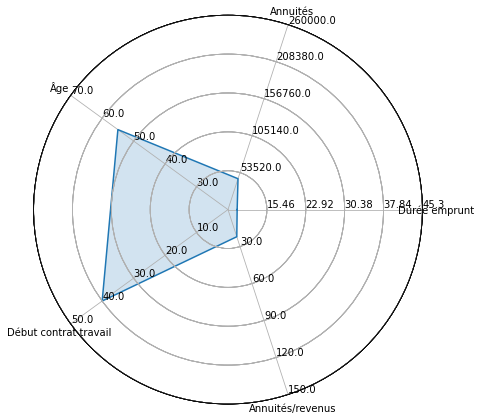

In [178]:
#https://qastack.fr/datascience/6084/how-do-i-create-a-complex-radar-chart

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ("Durée emprunt", "Annuités", "Âge", 
            "Début contrat travail", "Annuités/revenus")
data_ex = (9.76, 45000, 55, 40, 22)
ranges = [(8.0, 45.3), (1900, 260000), (20, 70),
         (0,50), (0, 150)]            
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data_ex)
radar.fill(data_ex, alpha=0.2)
plt.show()    

In [46]:
def interpretable_sans_unite(df):
    """Fonction qui va rendre les colonnes d'un df interpretables (sans unité)"""
    df_int = pd.DataFrame(index=range(len(df)),
                          columns=['Identifiant',
                                   'Durée emprunt',
                                   'Annuités',
                                   'Âge',
                                   'Début contrat travail',
                                   'Annuités/revenus',
                                   'Défaut paiement'])

    for i in range(len(df)) :
        df_int['Identifiant'].iloc[i] = int(df['SK_ID_CURR'].iloc[i])

        df_int["Durée emprunt"].iloc[i] = np.around(1 / df['PAYMENT_RATE'].iloc[i], decimals=1)

        df_int['Annuités'].iloc[i] = df['AMT_ANNUITY'].iloc[i]

        df_int['Âge'].iloc[i] = np.around(df['DAYS_BIRTH'].iloc[i] / -365, decimals=1)

        df_int['Début contrat travail'].iloc[i] = np.around(df['DAYS_EMPLOYED'].iloc[i] / -365, decimals=1)

        df_int['Annuités/revenus'].iloc[i] = np.around(df['ANNUITY_INCOME_PERC'].iloc[i] * 100, decimals=1)

        if 'TARGET' in df.columns:
            if df['TARGET'].iloc[i] == 1.0:
                df_int['Défaut paiement'].iloc[i] = 'Oui'
            elif df['TARGET'].iloc[i] == 0:
                df_int['Défaut paiement'].iloc[i] = 'Non'
            else:
                df_int['Défaut paiement'].iloc[i] = 'Inconnu'
        else:
            df_int['Défaut paiement'].iloc[i] = 'Inconnu'

    return df_int

In [47]:
#df_interp_sans_unite = interpretable_sans_unite(data)
#df_interp_sans_unite.drop('Défaut paiement', axis=1, inplace=True)
#df_interp_sans_unite.to_csv('df_interp_sans_unite')
df_interp_sans_unite = pd.read_csv('df_interp_sans_unite')
df_interp_sans_unite.drop('Unnamed: 0', axis=1, inplace=True)
df_interp_sans_unite.head()

,Identifiant,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus
0,100002,16.50,"24,700.50",25.90,1.70,12.20
1,100003,36.20,"35,698.50",45.90,3.30,13.20
2,100004,20.00,"6,750.00",52.20,0.60,10.00
3,100006,10.50,"29,686.50",52.10,8.30,22.00
4,100007,23.50,"21,865.50",54.60,8.30,18.00


In [48]:
df_interp_sans_unite.describe()

,Identifiant,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus
count,"291,568.00","291,568.00","291,568.00","291,568.00","291,568.00","291,568.00"
mean,"278,084.80",20.92,"28,175.08",40.45,6.57,17.78
std,"102,876.17",7.80,"14,916.34",10.00,6.40,9.13
min,"100,001.00",8.00,"1,980.00",20.10,0.00,0.00
25%,"188,941.75",14.90,"17,266.50",32.30,2.10,11.30
50%,"278,045.50",20.00,"26,050.50",39.90,4.60,16.10
75%,"367,237.25",26.20,"35,937.00",48.10,8.80,22.50
max,"456,255.00",45.30,"258,025.50",69.00,49.10,151.20


## Création des groupes de clients

In [968]:
df_group = pd.read_csv('home-credit-default-risk/application_train.csv')
test_df = pd.read_csv('home-credit-default-risk/application_test.csv')

print("Train samples: {}, test samples: {}".format(len(df_group), len(test_df)))

df_group = df_group.append(test_df)
df_group = df_group[~(df_group.CODE_GENDER.str.contains("XNA"))]
df_group = df_group[~(df_group.ORGANIZATION_TYPE.str.contains("XNA"))]
df_group = df_group[~(df_group.NAME_EDUCATION_TYPE.str.contains("XNA"))]
df_group = reduce_mem_usage(df_group)

Train samples: 307511, test samples: 48744
Memory usage of dataframe is 273.64 MB
Memory usage after optimization is: 58.41 MB
Decreased by 78.7%


In [969]:
df_group.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.00,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50","351,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,"-3,648.00",-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0.00,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,"-1,186.00",-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.98,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.98,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.98,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0.00,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00","135,000.00",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,"-4,260.00",-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-8

### Genre

In [970]:
genre = df_group[['TARGET', 'CODE_GENDER', 'SK_ID_CURR']]
genre.rename(columns={'SK_ID_CURR':'Identifiant'}, inplace=True)
genre = genre.merge(df_interp_sans_unite,
                    how='right', on='Identifiant').drop('Identifiant', axis=1)

In [971]:
count = pd.DataFrame(data=genre.groupby(['TARGET', 'CODE_GENDER']).count()['Durée emprunt'])
count.rename(columns={'Durée emprunt': 'Count'}, inplace=True)
count

Count
TARGET CODE_GENDER        
0.00   F            145247
       M             85037
1.00   F             11921
       M              9914

In [972]:
genre = genre.groupby(['TARGET', 'CODE_GENDER']).mean()
genre = genre.join(count)
genre.reset_index(inplace=True)
genre

,TARGET,CODE_GENDER,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count
0,0.00,F,22.01,"27,177.39",41.19,7.13,18.58,145247
1,0.00,M,20.99,"29,141.89",39.77,5.92,16.12,85037
2,1.00,F,21.17,"25,972.89",38.34,5.37,19.27,11921
3,1.00,M,19.60,"27,924.58",38.30,4.49,17.15,9914


In [973]:
def percent(df, col):
    df['Percentage'] = 0
    for cat in df[col].unique():
        somme = df.groupby([col]).sum().loc[cat, 'Count']
        df['Percentage'] = np.where(df[col] == cat,
                                    round(df['Count'] / somme * 100, 1),
                                    df.Percentage)
    df.Percentage = df.Percentage.apply(lambda x: str(x) + ' %')
    df['Cible'] = 0
    df['Cible'] = np.where(df.TARGET == 1.0, "Impayés", df.Cible)
    df['Cible'] = np.where(df.TARGET == 0.0, "Pas d'impayés", df.Cible)
    return df

percent(genre, 'CODE_GENDER')

,TARGET,CODE_GENDER,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count,Percentage,Cible
0,0.00,F,22.01,"27,177.39",41.19,7.13,18.58,145247,92.4 %,Pas d'impayés
1,0.00,M,20.99,"29,141.89",39.77,5.92,16.12,85037,89.6 %,Pas d'impayés
2,1.00,F,21.17,"25,972.89",38.34,5.37,19.27,11921,7.6 %,Impayés
3,1.00,M,19.60,"27,924.58",38.30,4.49,17.15,9914,10.4 %,Impayés


In [974]:
def bar_plot(df, col):
    labels={'CODE_GENDER': 'Genre',
            'ORGANIZATION_TYPE': "Type d'entreprise",
            'NAME_EDUCATION_TYPE': "Niveau d'éducation",
            'AMT_INCOME': "Niveau de revenus",
            'NAME_FAMILY_STATUS': 'Statut marital',
            'Count': 'Effectif'}
    titre = f"Répartition du nombre et du pourcentage d'impayés suivant le {str.lower(labels[col])}"
    fig = px.bar(df, x=col, y="Count",
                 color="Cible", text="Percentage",
                 labels=labels,
                 color_discrete_sequence=['#90ee90', '#ff4500'],
                 title=titre
                )
    fig.show()

bar_plot(genre, 'CODE_GENDER')

In [975]:
genre.to_csv('genre', index=False)

### Type d'entreprise

In [976]:
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.str.contains("Business Entity"),
                                         "Entité commerciale", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.str.contains("Industry"),
                                         "Industrie", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.str.contains("Trade"),
                                         "Commerce", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.str.contains("Transport"),
                                         "Transport", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["School", "Kindergarten", "University"]),
                                         "Education", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["Emergency","Police", "Medicine",
                                                                          "Goverment", "Postal", "Military",
                                                                          "Security Ministries", "Legal Services"]),
                                         "Service public", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["Bank", "Insurance"]),
                                           "Finance", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["Realtor", "Housing"]),
                                         "Immobilier", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["Hotel", "Restaurant"]),
                                         "Hôtellerie Restauration", df_group.ORGANIZATION_TYPE)
df_group["ORGANIZATION_TYPE"] = np.where(df_group.ORGANIZATION_TYPE.isin(["Cleaning","Electricity",
                                                                          "Telecom","Mobile", "Advertising",
                                                                          "Religion", "Culture", "Other"]),
                                         "Autre", df_group.ORGANIZATION_TYPE)

In [977]:
organization_type = df_group[['TARGET', 'ORGANIZATION_TYPE', 'SK_ID_CURR']]
organization_type.rename(columns={'SK_ID_CURR':'Identifiant'}, inplace=True)
organization_type = organization_type.merge(df_interp_sans_unite, 
                                            how='right', on='Identifiant').drop('Identifiant', axis=1)

In [978]:
df_group['ORGANIZATION_TYPE'].unique()

array(['Entité commerciale', 'Education', 'Government', 'Autre',
       'Service public', 'Self-employed', 'Transport', 'Construction',
       'Immobilier', 'Commerce', 'Industrie', 'Services', 'Security',
       'Agriculture', 'Hôtellerie Restauration', 'Finance'], dtype=object)

In [979]:
count = pd.DataFrame(data=organization_type.groupby(['TARGET', 'ORGANIZATION_TYPE']).count()['Durée emprunt'])
count.rename(columns={'Durée emprunt': 'Count'}, inplace=True)

In [980]:
organization_type = organization_type.groupby(['TARGET', 'ORGANIZATION_TYPE']).mean()
organization_type = organization_type.join(count)
organization_type.reset_index(inplace=True)
percent(organization_type, 'ORGANIZATION_TYPE')
organization_type

,TARGET,ORGANIZATION_TYPE,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count,Percentage,Cible
0,0.00,Agriculture,21.73,"25,002.55",42.80,9.35,19.37,2197,89.5 %,Pas d'impayés
1,0.00,Autre,21.87,"27,732.29",42.30,7.61,17.73,18177,92.4 %,Pas d'impayés
2,0.00,Commerce,21.59,"27,244.64",38.02,4.63,17.74,13016,90.9 %,Pas d'impayés
3,0.00,Construction,21.21,"30,278.13",41.05,4.86,16.44,5936,88.3 %,Pas d'impayés
4,0.00,Education,22.62,"26,356.92",42.75,9.46,19.36,16024,93.7 %,Pas d'impayés
5,0.00,Entité commerciale,21.48,"28,634.31",40.03,5.79,17.11,76813,90.9 %,Pas d'impayés
6,0.00,Finance,22.27,"27,297.59",35.72,4.81,15.48,2939,94.7 %,Pas d'impayés
7,0.00,Government,22.38,"26,806.23",42.57,8.24,18.53,9677,93.0 %,Pas d'impayés
8,0.00,Hôtellerie Restauration,20.81,"26,535.81",41.11,5.29,18.53,2503,90.1 %,Pas d'impayés
9,0.00,Immobilier,22.30,"27,719.80",44.58,7.65,18.37,3077,91.7 %,Pas d'impayés


In [981]:
bar_plot(organization_type, 'ORGANIZATION_TYPE')

In [982]:
organization_type.to_csv('organization_type', index=False)

### Niveau d'éducation

In [983]:
df_group["NAME_EDUCATION_TYPE"] = np.where(df_group.NAME_EDUCATION_TYPE == "Academic degree",
                                           "Higher education", df_group.NAME_EDUCATION_TYPE)

In [984]:
education_type = df_group[['TARGET', 'NAME_EDUCATION_TYPE', 'SK_ID_CURR']]
education_type.rename(columns={'SK_ID_CURR':'Identifiant'}, inplace=True)
education_type = education_type.merge(df_interp_sans_unite,
                                      how='right', on='Identifiant').drop('Identifiant', axis=1)

In [985]:
count = pd.DataFrame(data=education_type.groupby(['TARGET', 'NAME_EDUCATION_TYPE']).count()['Durée emprunt'])
count.rename(columns={'Durée emprunt': 'Count'}, inplace=True)

In [986]:
education_type = education_type.groupby(['TARGET', 'NAME_EDUCATION_TYPE']).mean()
education_type = education_type.join(count)
education_type.reset_index(inplace=True)
percent(education_type, 'NAME_EDUCATION_TYPE')
education_type

,TARGET,NAME_EDUCATION_TYPE,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count,Percentage,Cible
0,0.00,Higher education,22.13,"31,193.48",39.35,6.58,16.48,63128,94.5 %,Pas d'impayés
1,0.00,Incomplete higher,20.47,"27,375.54",33.36,4.62,16.35,8907,91.3 %,Pas d'impayés
2,0.00,Lower secondary,21.14,"24,376.55",40.34,6.08,18.44,1970,86.2 %,Pas d'impayés
3,0.00,Secondary / secondary special,21.51,"26,648.08",41.62,6.84,18.22,156279,90.2 %,Pas d'impayés
4,1.00,Higher education,21.21,"29,958.73",37.92,4.98,17.16,3672,5.5 %,Impayés
5,1.00,Incomplete higher,19.53,"27,359.94",32.15,3.85,17.16,848,8.7 %,Impayés
6,1.00,Lower secondary,19.52,"24,689.46",38.51,4.79,19.84,315,13.8 %,Impayés
7,1.00,Secondary / secondary special,20.36,"26,204.72",38.71,5.03,18.59,17000,9.8 %,Impayés


In [987]:
bar_plot(education_type, 'NAME_EDUCATION_TYPE')

In [988]:
education_type.to_csv('education_type', index=False)

### Niveau de revenus

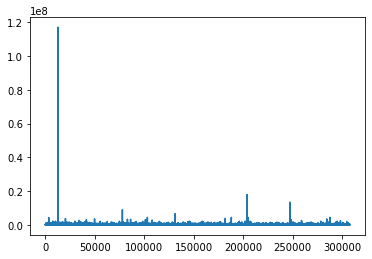

In [989]:
df_group['AMT_INCOME_TOTAL'].plot()
df_group['AMT_INCOME'] = 0

In [990]:
for i in range(len(df_group)):
    if df_group['AMT_INCOME_TOTAL'].iloc[i]<50000:
        df_group['AMT_INCOME'].iloc[i] = 'moins de 50 000 $'
    elif df_group['AMT_INCOME_TOTAL'].iloc[i]<100000:
        df_group['AMT_INCOME'].iloc[i] = 'entre 50 000 et 100 000 $'
    elif df_group['AMT_INCOME_TOTAL'].iloc[i]<150000:
        df_group['AMT_INCOME'].iloc[i] = 'entre 100 000 et 150 000 $'
    elif df_group['AMT_INCOME_TOTAL'].iloc[i]<200000:
        df_group['AMT_INCOME'].iloc[i] = 'entre 150 000 et 200 000 $'
    elif df_group['AMT_INCOME_TOTAL'].iloc[i]<250000:
        df_group['AMT_INCOME'].iloc[i] = 'entre 200 000 et 250 000 $'
    elif df_group['AMT_INCOME_TOTAL'].iloc[i]<300000:
        df_group['AMT_INCOME'].iloc[i] = 'entre 250 000 et 300 000 $'
    else:
        df_group['AMT_INCOME'].iloc[i] = 'plus de 300 000 $'


In [991]:
income = df_group[['TARGET', 'AMT_INCOME', 'SK_ID_CURR']]
income.rename(columns={'SK_ID_CURR':'Identifiant'}, inplace=True)
income = income.merge(df_interp_sans_unite,
                      how='right', on='Identifiant').drop('Identifiant', axis=1)

In [992]:
count = pd.DataFrame(data=income.groupby(['TARGET', 'AMT_INCOME']).count()['Durée emprunt'])
count.rename(columns={'Durée emprunt': 'Count'}, inplace=True)


In [993]:
income = income.groupby(['TARGET', 'AMT_INCOME']).mean()
income = income.join(count)
income.reset_index(inplace=True)
percent(income, 'AMT_INCOME')
income

,TARGET,AMT_INCOME,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count,Percentage,Cible
0,0.00,entre 100 000 et 150 000 $,21.24,"23,896.23",40.18,6.52,19.23,67717,90.7 %,Pas d'impayés
1,0.00,entre 150 000 et 200 000 $,21.88,"28,639.61",40.65,6.72,16.92,50267,91.1 %,Pas d'impayés
2,0.00,entre 200 000 et 250 000 $,22.34,"32,852.44",41.09,6.82,14.99,39045,91.9 %,Pas d'impayés
3,0.00,entre 250 000 et 300 000 $,22.91,"36,294.10",41.57,7.10,13.26,14136,92.8 %,Pas d'impayés
4,0.00,entre 50 000 et 100 000 $,20.31,"18,685.29",40.11,6.36,23.03,37697,90.4 %,Pas d'impayés
5,0.00,moins de 50 000 $,19.12,"14,074.37",40.97,6.67,32.78,1794,90.5 %,Pas d'impayés
6,0.00,plus de 300 000 $,22.87,"42,916.18",41.93,7.16,11.08,19628,93.9 %,Pas d'impayés
7,1.00,entre 100 000 et 150 000 $,20.04,"24,343.71",37.62,4.79,19.64,6951,9.3 %,Impayés
8,1.00,entre 150 000 et 200 000 $,20.70,"28,595.47",38.29,4.94,16.94,4916,8.9 %,Impayés
9,1.00,entre 200 000 et 250 000 $,21.04,"31,566.96",39.53,5.22,14.46,3426,8.1 %,Impayés


In [994]:
bar_plot(income, 'AMT_INCOME')

In [995]:
income.to_csv('income', index=False)

### Statut marital

In [996]:
df_group['NAME_FAMILY_STATUS'].unique()

['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
Categories (6, object): ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']

In [997]:
family = df_group[['TARGET', 'NAME_FAMILY_STATUS', 'SK_ID_CURR']]
family.rename(columns={'SK_ID_CURR':'Identifiant'}, inplace=True)
family = family.merge(df_interp_sans_unite,
                    how='right', on='Identifiant').drop('Identifiant', axis=1)

In [998]:
count = pd.DataFrame(data=family.groupby(['TARGET', 'NAME_FAMILY_STATUS']).count()['Durée emprunt'])
count.rename(columns={'Durée emprunt': 'Count'}, inplace=True)
count

Count
TARGET NAME_FAMILY_STATUS          
0.00   Civil marriage         23460
       Married               150715
       Separated              14608
       Single / not married   35194
       Unknown                    0
       Widow                   6307
1.00   Civil marriage          2734
       Married                13189
       Separated               1392
       Single / not married    4119
       Unknown                    0
       Widow                    401

In [999]:
family = family.groupby(['TARGET', 'NAME_FAMILY_STATUS']).mean()
family = family.join(count)
family.reset_index(inplace=True)
percent(family, 'NAME_FAMILY_STATUS')
family

,TARGET,NAME_FAMILY_STATUS,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus,Count,Percentage,Cible
0,0.00,Civil marriage,21.20,"25,526.25",39.34,5.82,16.19,23460,89.6 %,Pas d'impayés
1,0.00,Married,22.01,"29,281.90",41.14,7.00,18.63,150715,92.0 %,Pas d'impayés
2,0.00,Separated,21.67,"25,708.70",43.46,6.93,15.66,14608,91.3 %,Pas d'impayés
3,0.00,Single / not married,20.22,"25,054.59",36.34,5.32,15.63,35194,89.5 %,Pas d'impayés
4,0.00,Unknown,NaN,NaN,NaN,NaN,NaN,0,nan %,Pas d'impayés
5,0.00,Widow,22.29,"24,763.04",51.98,9.34,16.35,6307,94.0 %,Pas d'impayés
6,1.00,Civil marriage,19.94,"25,014.60",37.95,4.45,16.92,2734,10.4 %,Impayés
7,1.00,Married,20.87,"28,090.31",38.89,5.31,19.34,13189,8.0 %,Impayés
8,1.00,Separated,20.67,"25,414.96",41.39,5.14,16.40,1392,8.7 %,Impayés
9,1.00,Single / not married,19.19,"24,777.69",34.56,3.98,16.70,4119,10.5 %,Impayés


In [1000]:
bar_plot(family, 'NAME_FAMILY_STATUS')

In [1001]:
bar_plot(family[family['NAME_FAMILY_STATUS'] == 'Married'], 'NAME_FAMILY_STATUS')

In [1002]:
family.to_csv('family', index=False)

### Bilan

In [1003]:
df_group = df_group[['SK_ID_CURR', 'CODE_GENDER', 'ORGANIZATION_TYPE',
                     'NAME_EDUCATION_TYPE', 'AMT_INCOME', 'NAME_FAMILY_STATUS']]
df_group.head()

,SK_ID_CURR,CODE_GENDER,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,AMT_INCOME,NAME_FAMILY_STATUS
0,100002,M,Entité commerciale,Secondary / secondary special,entre 200 000 et 250 000 $,Single / not married
1,100003,F,Education,Higher education,entre 250 000 et 300 000 $,Married
2,100004,M,Government,Secondary / secondary special,entre 50 000 et 100 000 $,Single / not married
3,100006,F,Entité commerciale,Secondary / secondary special,entre 100 000 et 150 000 $,Civil marriage
4,100007,M,Autre,Secondary / secondary special,entre 100 000 et 150 000 $,Single / not married


In [1004]:
df_group[df_group['SK_ID_CURR'] == 100005]['CODE_GENDER'].iloc[0]

'M'

# 2. Application

In [555]:
identifiant = 100005

In [966]:
# import des données 
df = pd.read_csv("df_complet_api")
df.drop('Unnamed: 0', axis=1, inplace=True)

proba_impayes = pd.read_csv('Proba_impayés')
proba_impayes.rename({'SK_ID_CURR': 'Identifiant'}, axis=1, inplace=True)

df_int = pd.read_csv('df_interprete')
df_int = df_int.drop('Unnamed: 0', axis=1)

df_int_sans_unite = pd.read_csv('df_interp_sans_unite')
df_int_sans_unite.drop('Unnamed: 0', axis=1, inplace=True)

genre = pd.read_csv('genre')
income = pd.read_csv('income')
education_type = pd.read_csv('education_type')
organization_type = pd.read_csv('organization_type')



interpretable_important_data = ['SK_ID_CURR',
                                'PAYMENT_RATE',
                                'AMT_ANNUITY',
                                'DAYS_BIRTH',
                                'DAYS_EMPLOYED',
                                'ANNUITY_INCOME_PERC']

interpretable_important_data_target = ['SK_ID_CURR',
                                       'PAYMENT_RATE',
                                       'AMT_ANNUITY',
                                       'DAYS_BIRTH',
                                       'DAYS_EMPLOYED',
                                       'ANNUITY_INCOME_PERC',
                                       'TARGET']

In [967]:
print(len(df['SK_ID_CURR']))
print(len(df_group['SK_ID_CURR']))

291568
291603


In [964]:
df_group.to_csv('df_group', index=False)

In [559]:
# import du modèle lgbm entrainé
infile = open('/Users/cindygirardin/PycharmProjects/P7_code_app/LightGBMModel.pkl', 'rb')
lgbm = load(infile)
infile.close()

# import du modèle NearestNeighbors entrainé sur le trainset
infile = open('/Users/cindygirardin/PycharmProjects/P7_code_app/NearestNeighborsModel.pkl', 'rb')
nn = load(infile)
infile.close()

# import du dataframe nettoyé pour le NearestNeighbors
infile = open('/Users/cindygirardin/PycharmProjects/P7_code_app/df_nn.pkl', 'rb')
df_nn = load(infile)
infile.close()

# import du Standard Scaler entrainé pour le NearestNeighbors
infile = open('/Users/cindygirardin/PycharmProjects/P7_code_app/StandardScaler.pkl', 'rb')
std = load(infile)
infile.close()

In [560]:
df_client = df[df['SK_ID_CURR'] == identifiant]
df_client_int = df_int[df_int['Identifiant'] == identifiant]
df_client_int_SU = df_int_sans_unite[df_int_sans_unite['Identifiant'] == identifiant]
df_client_int.set_index('Identifiant', inplace=True)
# on affiche notre client
print('## Informations client')
df_client_int.drop('Défaut paiement', axis=1)

## Informations client


,Durée emprunt,Annuités,Âge,Employé depuis,Annuités/revenus
Identifiant,,,,,
100005,12.8 ans,17370.0 $,49.5 ans,12.2 ans,17.5 %


In [561]:
df_client

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_CHILDREN,NAME_TYPE_SUITE_FAMILY,NAME_TYPE_SUITE_RARE,NAME_TYPE_SUITE_SPOUSE_PARTNER,NAME_TYPE_SUITE_UNACCOMPANIED,NAME_INCOME_TYPE_COMMERCIAL_ASSOCIATE,NAME_INCOME_TYPE_PENSIONER,NAME_INCOME_TYPE_RARE,NAME_INCOME_TYPE_STATE_SERVANT,NAME_INCOME_TYPE_WORKING,NAME_EDUCATION_TYPE_HIGHER_EDUCATION,NAME_EDUCATION_TYPE_INCOMPLETE_HIGHER,NAME_EDUCATION_TYPE_LOWER_SECONDARY,NAME_EDUCATION_TYPE_SECONDARY_SECONDARY_SPECIAL,NAME_FAMILY_STATUS_CIVIL_MARRIAGE,NAME_FAMILY_STATUS_MARRIED,NAME_FAMILY_STATUS_SEPARATED,NAME_FAMILY_STATUS_SINGLE_NOT_MARRIED,NAME_FAMILY_STATUS_UNKNOWN,NAME_FAMILY_STATUS_WIDOW,OCCUPATION_TYPE_ACCOUNTANTS,OCCUPATION_TYPE_CORE_STAFF,OCCUPATION_TYPE_DRIVERS,OCCUPATION_TYPE_HR_STAFF,OCCUPATION_TYPE_HIGH_SKILL_TECH_STAFF,OCCUPATION_TYPE_LABORERS,OCCUPATION_TYPE_LOW_SKILL_LABORERS,OCCUPATION_TYPE_MANAGERS,OCCUPATION_TYPE_MEDICINE_STAFF,OCCUPATION_TYPE_REALTY_AGENTS,OCCUPATION_TYPE_SALES_STAFF,OCCUPATION_TYPE_SECRETARIES,ORGANIZATION_TYPE_AGRICULTURE,ORGANIZATION_TYPE_BUSINESS_ENTITY,ORGANIZATION_TYPE_CONSTRUCTION,ORGANIZATION_TYPE_EDUCATION,ORGANIZATION_TYPE_FINANCE,ORGANIZATION_TYPE_GOVERNMENT,ORGANIZATION_TYPE_HOTELRESTAURANT,ORGANIZATION_TYPE_HOUSE,ORGANIZATION_TYPE_INDUSTRY,ORGANIZATION_TYPE_OTHER,ORGANIZATION_TYPE_PUBLIC,ORGANIZATION_TYPE_SECURITY,ORGANIZATION_TYPE_SELF_EMPLOYED,ORGANIZATION_TYPE_SERVICES,ORGANIZATION_TYPE_TRADE,ORGANIZATION_TYPE_TRANSPORT,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,NEW_EXT_MEAN,NEW_APP_EXT_SOURCES_PROD,NEW_GOODS_CREDIT,NEW_C_GP,NEW_APP_AGE,NEW_LOAN_VALUE_RATIO,INCOME_PER_PERSON_PERC_PAYMENT_RATE,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MAX,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_STD,POS_CNT_INSTALMENT_MIN,POS_CNT_INSTALMENT_MEDIAN,POS_CNT_INSTALMENT_FUTURE_MAX,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_CNT_INSTALMENT_FUTURE_SUM,POS_CNT_INSTALMENT_FUTURE_MIN,POS_CNT_INSTALMENT_FUTURE_MEDIAN,POS_CNT_INSTALMENT_FUTURE_STD,POS_SK_DPD_MAX,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MAX,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_ACTIVE_MEAN,POS_NAME_CONTRACT_STATUS_COMPLETED_MEAN,POS_NAME_CONTRACT_STATUS_RARE_MEAN,POS_COUNT,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BU

In [562]:
feats = [f for f in df_client.columns if f not in ['SK_ID_CURR', 'TARGET']]
lgbm.predict_proba(df_client[feats])

array([[0.40131845, 0.59868155]])

In [563]:
results = pd.DataFrame(lgbm.predict_proba(df_client[feats]), index=[identifiant])
    
results.rename({0: "Absence de défaut de paiement", 1: "Impayés"}, axis=1, inplace=True)
    
print("## Prédiction")
results

## Prédiction


,Absence de défaut de paiement,Impayés
100005,0.40,0.60


In [564]:
proba = proba_impayes[proba_impayes['Identifiant'] == identifiant]["Probabilité d'impayés"].iloc[0]
proba

0.5986815523948141

In [565]:
def_p = "Défaut paiement : " + str(df_client_int['Défaut paiement'].iloc[0])
if proba < 0.5:
    print("Résultat : :white_check_mark: **Faible risque d'impayés** ")
    print(def_p)
else:
    print("Résultat : :warning: **Risque d'impayés important, client à surveiller** ")
    print('>', def_p)

Résultat : :warning: **Risque d'impayés important, client à surveiller** 
> Défaut paiement : Inconnu


In [566]:
# plus proches voisins
client_list = std.transform(df_client[interpretable_important_data])  # standardisation
distance, voisins = nn.kneighbors(client_list)
voisins = voisins[0]

# on crée un dataframe avec les voisins
voisins_table = pd.DataFrame()
for v in range(1, len(voisins)):
    voisins_table[v] = df_nn.iloc[voisins[v]]

print("## Profils de clients similaires ")
voisins_int = pd.DataFrame(index=range(len(voisins_table.transpose())),
                           columns=df_int.columns)
i = 0
for id in voisins_table.transpose()['SK_ID_CURR']:
    voisins_int.iloc[i] = df_int[df_int['Identifiant'] == id]
    i += 1
voisins_int.set_index('Identifiant', inplace=True)
print(voisins_int)

## Profils de clients similaires 
            Durée emprunt   Annuités       Âge Employé depuis  \
Identifiant                                                     
113455           13.4 ans  16821.0 $  48.0 ans       12.0 ans   
113154           14.3 ans  17338.5 $  46.7 ans       11.9 ans   
111251           13.7 ans  16434.0 $  47.1 ans       12.4 ans   
119296           12.5 ans  18040.5 $  53.1 ans       13.0 ans   
108125           13.7 ans  18063.0 $  49.5 ans       11.4 ans   

            Annuités/revenus Défaut paiement  
Identifiant                                   
113455                15.0 %             Non  
113154                19.3 %             Non  
111251                14.0 %             Non  
119296                14.8 %             Non  
108125                13.4 %             Non  


In [597]:
def radar_chart(client, param):
    """Fonction qui trace le graphe radar du client comparé aux crédits accordés/refusés
    pour un certain paramètre"""

    def _invert(x, limits):
        """inverts a value x on a scale from
        limits[0] to limits[1]"""
        return limits[1] - (x - limits[0])

    def _scale_data(data, ranges):
        """scales data[1:] to ranges[0],
        inverts if the scale is reversed"""
        for d, (y1, y2) in zip(data, ranges):
            assert (y1 <= d <= y2) or (y2 <= d <= y1)
            
        x1, x2 = ranges[0]
        d = data[0]
        
        if x1 > x2:
            d = _invert(d, (x1, x2))
            x1, x2 = x2, x1
            
        sdata = [d]
        
        for d, (y1, y2) in zip(data[1:], ranges[1:]):
            if y1 > y2:
                d = _invert(d, (y1, y2))
                y1, y2 = y2, y1
                
            sdata.append((d - y1) / (y2 - y1) * (x2 - x1) + x1)
            
        return sdata


    class ComplexRadar():
        def __init__(self, fig, variables, ranges,
                     n_ordinate_levels=6):
            angles = np.arange(0, 360, (360. / len(variables)))

            axes = [fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True,
                                 label="axes{}".format(i))
                    for i in range(len(variables))]

            axes[0].set_thetagrids(angles,labels=[])

            for ax in axes[1:]:
                ax.patch.set_visible(False)
                ax.grid("off")
                ax.xaxis.set_visible(False)
                
            for i, ax in enumerate(axes):
                grid = np.linspace(*ranges[i],
                                   num=n_ordinate_levels)
                gridlabel = ["{}".format(round(x, 2))
                             for x in grid]
                if ranges[i][0] > ranges[i][1]:
                    grid = grid[::-1]  # hack to invert grid
                    # gridlabels aren't reversed
                gridlabel[0] = ""  # clean up origin
                ax.set_rgrids(grid, labels=gridlabel,angle=angles[i])
                #ax.spines["polar"].set_visible(False)
                ax.set_ylim(*ranges[i])
                
            ticks = angles
            ax.set_xticks(np.deg2rad(ticks)) # crée les axes suivant les angles, en radians
            ticklabels = variables
            ax.set_xticklabels(ticklabels, fontsize=10) # définit les labels

            angles1 = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
            angles1[np.cos(angles1) < 0] = angles1[np.cos(angles1) < 0] + np.pi
            angles1 = np.rad2deg(angles1)
            labels = []
            for label, angle in zip(ax.get_xticklabels(), angles1):
                x,y = label.get_position()
                lab = ax.text(x,y-.45, # pour décaler les labels sur les axes
                              label.get_text(), transform=label.get_transform(),
                              ha=label.get_ha(), va=label.get_va())
                lab.set_rotation(angle)
                lab.set_fontsize(16)
                lab.set_fontweight('bold')
                labels.append(lab)
            ax.set_xticklabels([])              
                
            # variables for plotting
            self.angle = np.deg2rad(np.r_[angles, angles[0]])
            self.ranges = ranges
            self.ax = axes[0]

        def plot(self, data, *args, **kw):
            sdata = _scale_data(data, self.ranges)
            self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

        def fill(self, data, *args, **kw):
            sdata = _scale_data(data, self.ranges)
            self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def ok_impayes(df, var_name):
        cat = df_group[df_group['SK_ID_CURR'] == identifiant][var_name].iloc[0]
        ok = df[df[var_name] == cat][df['TARGET'] == 0]
        ok.drop(['TARGET', var_name], inplace=True, axis=1)
        impayes = df[df[var_name] == cat][df['TARGET'] == 1]
        impayes.drop(['TARGET', var_name], inplace=True, axis=1)
        return ok, impayes, cat
            
    if param == 'Genre':
        df = genre.copy()
        ok, impayes, cat = ok_impayes(df, 'CODE_GENDER')
        client = pd.concat([client, ok, impayes], ignore_index=True)
        
        
    if param == "Type d'entreprise":
        df = organization_type.copy()
        ok, impayes, cat = ok_impayes(df, 'ORGANIZATION_TYPE')
        client = pd.concat([client, ok, impayes], ignore_index=True)

    if param == "Niveau d'éducation":
        df = education_type.copy()
        ok, impayes, cat = ok_impayes(df, 'NAME_EDUCATION_TYPE')
        client = pd.concat([client, ok, impayes], ignore_index=True)
        
    if param == "Niveau de revenus":
        df = income.copy()
        ok, impayes, cat = ok_impayes(df, 'AMT_INCOME')
        client = pd.concat([client, ok, impayes], ignore_index=True)
        
    
    # data
    variables = ("Durée emprunt", "Annuités", "Âge",
                 "Début contrat travail", "Annuités/revenus")
    data_ex = client.iloc[0]
    ranges = [(min(client["Durée emprunt"])-1, max(client["Durée emprunt"])+1),
              (min(client["Annuités"])-100, max(client["Annuités"])+100),
              (min(client["Âge"])-5, max(client["Âge"])+5),
              (min(client["Début contrat travail"])-1, max(client["Début contrat travail"])+1),
              (min(client["Annuités/revenus"])-5, max(client["Annuités/revenus"])+5)]
    # plotting
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(data_ex, label='Notre client')
    radar.fill(data_ex, alpha=0.2)    
        
    radar.plot(ok.iloc[0],
               label='Moyenne des clients similaires sans défaut de paiement',
               color='g')
    radar.plot(impayes.iloc[0],
               label='Moyenne des clients similaires avec défaut de paiement',
               color='r')
    
    fig1.legend(bbox_to_anchor=(1.7,1))
        
    plt.show()

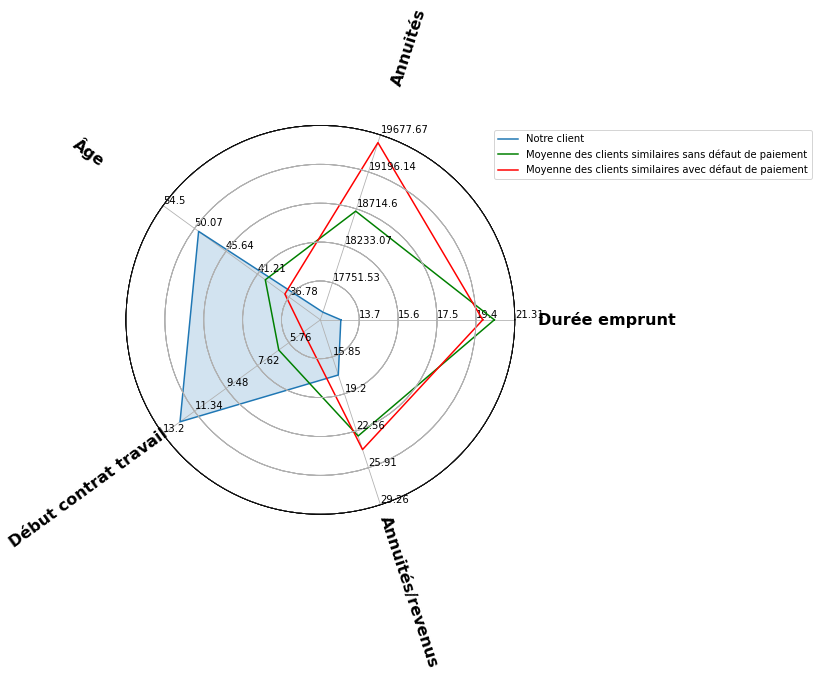

In [598]:
# création du graphe radar 
radar_chart(df_client_int_SU.drop('Identifiant', axis=1), param='Niveau de revenus')

Durée emprunt               12.80
Annuités                17,370.00
Âge                         49.50
Début contrat travail       12.20
Annuités/revenus            17.50
Name: 252120, dtype: float64

In [326]:
df_group[df_group['SK_ID_CURR'] == 100005]['AMT_INCOME'].iloc[0]

'Entre 50 000 et 100 000 $'

In [327]:
income[income['AMT_INCOME'] == 'Entre 50 000 et 100 000 $']

,TARGET,AMT_INCOME,Durée emprunt,Annuités,Âge,Début contrat travail,Annuités/revenus
4,0.00,Entre 50 000 et 100 000 $,20.31,"18,685.29",40.11,6.36,23.03
11,1.00,Entre 50 000 et 100 000 $,19.74,"19,577.67",37.35,4.90,24.26


In [583]:
variables = ["Durée emprunt",
             "Annuités",
             "Âge",
             "Début contrat travail",
             "Annuités/revenus"]
ranges = [(min(client["Durée emprunt"])-1, max(client["Durée emprunt"])+1),
              (min(client["Annuités"])-100, max(client["Annuités"])+100),
              (min(client["Âge"])-5, max(client["Âge"])+5),
              (min(client["Début contrat travail"])-1, max(client["Début contrat travail"])+1),
              (min(client["Annuités/revenus"])-5, max(client["Annuités/revenus"])+5)]


[Text(0.0, 0, ''),
 Text(1.2566370614359172, 0, ''),
 Text(2.5132741228718345, 0, ''),
 Text(3.7699111843077517, 0, ''),
 Text(5.026548245743669, 0, '')]

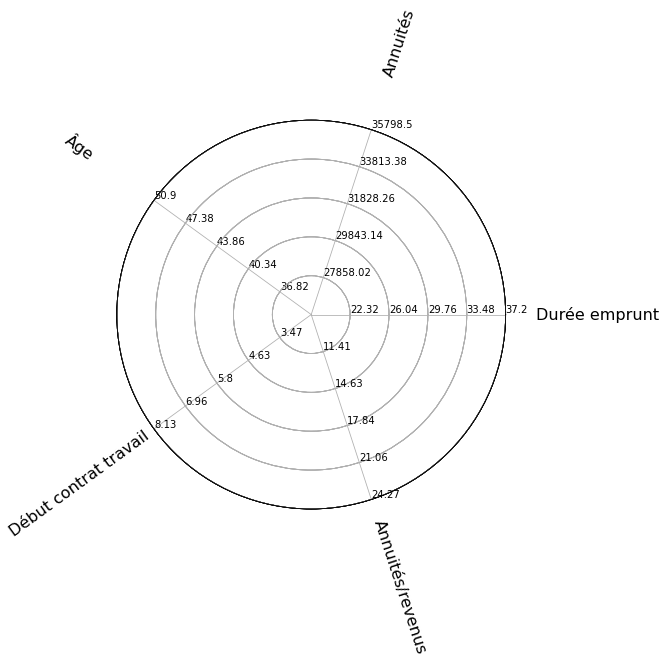

In [584]:
fig = plt.figure(figsize=(6, 6))
angles = np.arange(0, 360, (360. / len(variables)))

axes = [fig.add_axes([0.1, 0.1, 0.9, 0.9], polar=True,
                                 label="axes{}".format(i))
                    for i in range(len(variables))]

axes[0].set_thetagrids(angles,labels=[])

for ax in axes[1:]:
    ax.patch.set_visible(False)
    ax.grid("off")
    ax.xaxis.set_visible(False)

for i, ax in enumerate(axes):
    grid = np.linspace(*ranges[i],num=6)
    gridlabel = ["{}".format(round(x, 2)) for x in grid]
    if ranges[i][0] > ranges[i][1]:
        grid = grid[::-1]  # hack to invert grid
                    # gridlabels aren't reversed
    gridlabel[0] = ""  # clean up origin
    ax.set_rgrids(grid, labels=gridlabel,angle=angles[i])
    #ax.spines["polar"].set_visible(False)
    ax.set_ylim(*ranges[i])

ticks= angles
ax.set_xticks(np.deg2rad(ticks)) # crée les axes suivant les angles, en radians
ticklabels = variables
ax.set_xticklabels(ticklabels, fontsize=10) # définit les labels

angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
angles = np.rad2deg(angles)
labels = []
for label, angle in zip(ax.get_xticklabels(), angles):
    x,y = label.get_position()
    lab = ax.text(x,y-.4, label.get_text(), transform=label.get_transform(),
                              ha=label.get_ha(), va=label.get_va())
    lab.set_rotation(angle)
    lab.set_fontsize(16)
    labels.append(lab)
ax.set_xticklabels([])

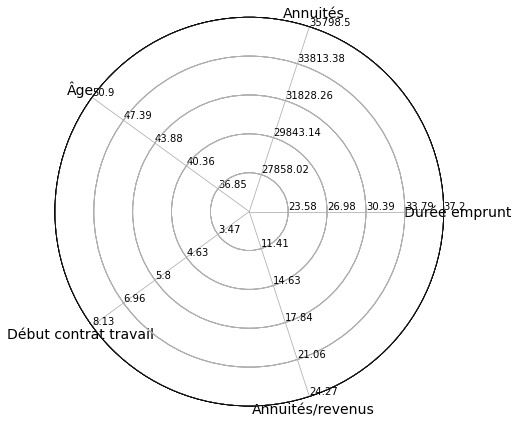

In [534]:
fig1 = plt.figure(figsize=(6, 6))

angles = np.arange(0, 360, (360. / len(variables)))

axes = [fig1.add_axes([0.1, 0.1, 0.9, 0.9], polar=True,
                                 label="axes{}".format(i))
                    for i in range(len(variables))]
l, text = axes[0].set_thetagrids(angles,
                                             labels=variables)
[txt.set_rotation(angle) for txt, angle in zip(text, angles)]
[txt.set_fontsize(14) for txt, angle in zip(text, angles)]
for ax in axes[1:]:
    ax.patch.set_visible(False)
    ax.grid("off")
    ax.xaxis.set_visible(False)
for i, ax in enumerate(axes):
    grid = np.linspace(*ranges[i],
                                   num=6)
    gridlabel = ["{}".format(round(x, 2))
                             for x in grid]
    if ranges[i][0] > ranges[i][1]:
        grid = grid[::-1]  # hack to invert grid
                    # gridlabels aren't reversed
    gridlabel[0] = ""  # clean up origin
    ax.set_rgrids(grid, labels=gridlabel,angle=angles[i])
                #ax.spines["polar"].set_visible(False)
    ax.set_ylim(*ranges[i])


In [1182]:
!git add P7_01_functions.py
!git commit -m "Ajout d'une fonction pour rendre le tableau interpretable"

[main 2cba723] Ajout d'une fonction pour rendre le tableau interpretable
 1 file changed, 4 insertions(+)
 create mode 100644 .gitattributes


In [1183]:
!git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 6 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 386 bytes | 386.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/cindygs/P7.git
   4c04e6d..2cba723  main -> main


Updating 3089bdf..4c04e6d
Fast-forward
 P7_notebook_test_API.ipynb | 2311 --------------------------------------------
 1 file changed, 2311 deletions(-)
 delete mode 100644 P7_notebook_test_API.ipynb


"df_complet_api" already supported


Uploading LFS objects: 100% (2/2), 2.2 GB | 0 B/s, done.                        
Enumerating objects: 28, done.
Counting objects: 100% (28/28), done.
Delta compression using up to 6 threads
Compressing objects: 100% (24/24), done.
Writing objects: 100% (27/27), 879.51 MiB | 20.15 MiB/s, done.
Total 27 (delta 4), reused 2 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), done.
remote: error: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
remote: error: Trace: 5b5b0d131baab93a34bb032e00605ed2d750fc512b95a7c89d4bf39858bdbda8
remote: error: See http://git.io/iEPt8g for more information.
remote: error: File df_complet_api is 1413.06 MB; this exceeds GitHub's file size limit of 100.00 MB
remote: error: File df_complet is 718.27 MB; this exceeds GitHub's file size limit of 100.00 MB
To https://github.com/cindygs/P7.git
 ! [remote rejected] main -> main (pre-receive hook declined)
error: failed to push some refs to 'https://gi

In [1164]:
!git lfs install
!git lfs push --all origin

Updated git hooks.
Git LFS initialized.
Uploading LFS objects: 100% (2/2), 2.2 GB | 0 B/s, done.                        
